1.Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.


In [1]:
import numpy as np
a=np.random.random((10, 3))
print(a)
a[np.arange(10),np.argmin(abs(a-0.5), axis = 1)]

[[0.9569289  0.56436924 0.10904839]
 [0.2829343  0.34195757 0.22312589]
 [0.736057   0.3313777  0.34241111]
 [0.09161867 0.66552041 0.21809956]
 [0.7018483  0.72550867 0.83770751]
 [0.26621106 0.93605935 0.88175227]
 [0.61085095 0.60615611 0.38386527]
 [0.9850924  0.48077007 0.61026992]
 [0.22200804 0.65709983 0.90650382]
 [0.79419019 0.72522172 0.29068195]]


array([0.56436924, 0.34195757, 0.34241111, 0.66552041, 0.7018483 ,
       0.26621106, 0.60615611, 0.48077007, 0.65709983, 0.29068195])

2.Создайте двумерный массив 6x6, заполненный случайными значениями.
Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [2]:
a=np.random.random((6, 6))
print(a)
np.sum(a, axis = 1)/a[np.argmin(abs(a-0.5), axis = 0),np.arange(6)]

[[0.30105911 0.53338057 0.63489093 0.94982153 0.56233857 0.78937131]
 [0.6568118  0.27994953 0.65010435 0.79344286 0.39347028 0.89579277]
 [0.5946208  0.73965765 0.4449215  0.24618784 0.22867198 0.1334469 ]
 [0.15367985 0.93463467 0.81153336 0.18933946 0.11898228 0.05577556]
 [0.42693917 0.26681338 0.53683826 0.20579869 0.87036858 0.84648209]
 [0.65664148 0.64712634 0.51433781 0.40522663 0.73304668 0.5572229 ]]


array([8.83231684, 6.87983743, 4.64190389, 5.58686173, 5.60736952,
       6.3055589 ])

На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [3]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
 
np.max(x[1:][(x==0)[:-1]])

5

4.Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [166]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
x + (np.indices((8, 10))[1] == i.reshape((8, 1))).sum(axis=0)

array([2., 2., 2., 2., 1., 4., 1., 1., 2., 1.])

5.Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать только один цикл while (for).

In [79]:
from numpy import linalg as LA
a=np.arange(10).reshape((5, -1))
k=3
def kmeans(a,k,e):
    p=e+1
    b=a[np.random.choice(a.shape[0], size=k, replace=False), :]
    while (p>e):
  #      print(a)
#        print(b)
        c=np.tile(a, [k, 1, 1])-np.swapaxes(np.tile(b, [a.shape[0], 1, 1]), 0, 1)
        #print(c)
        d=LA.norm(c, axis = 2)
        #print(d)
        g=np.min(d,axis = 0)
        g=np.tile(g, [k, 1])
        mask1 = d != g
        mask = np.tile(mask1, [a.shape[1], 1, 1]).swapaxes(0,1).swapaxes(1,2)
        #print(mask)
        h=np.tile(a, [k, 1, 1])
        h[mask]=0
 #       print(h)
 #       print('nen')
        h1=np.tile(b, [a.shape[0], 1, 1]).swapaxes(0,1)
        h1[mask]=0
        #print(h1)
        h2=h-h1
        h3=LA.norm(h2,axis=2)
#        print(h3)
#        print(mask1)
#        h4=np.sum(h3,axis = 1)/(a.shape[0]-np.sum(mask1,axis=1))
#        print(h4)
        h4=LA.norm(h3,axis=1)
        dis=np.max(h4)
#        print(dis)
        b1=np.sum(h,axis = 1)/(a.shape[0]-np.sum(mask,axis=1))
#        print(b1)
        p=np.max(LA.norm(b-b1,axis=1))
        b=b1
#        print(p)
    return b,dis
kmeans(a,3,0.001)        
          

(array([[8., 9.],
        [5., 6.],
        [1., 2.]]), 2.0)

6.С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

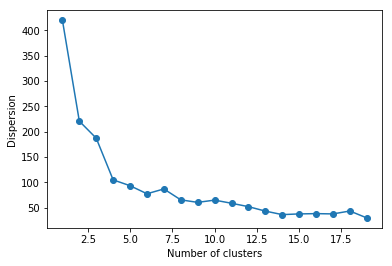

In [204]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
import matplotlib.pyplot as plt
#print(data)
L=[]
a1= data[:,[2,3]]
a0=a1
a1[:,0]/70
a1[:,1]/137
for k in range(1, 20):
    f=kmeans(a1,k,0.001)
    for i in range(7):
        f1=kmeans(a3,k,0.001)
        if (f1[1]<f[1]):
            f=f1
    L.append(f[1])
   # print(f[1])
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion')
plt.plot(range(1, 20), L, '-o')
plt.show()

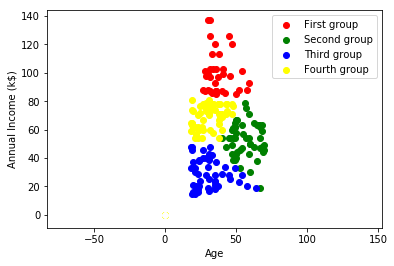

In [210]:
k=4
f=kmeans(a1,k,0.001) 
for i in range(7):
        f1=kmeans(a3,k,0.001)
        if (f1[1]<f[1]):
            f=f1
d=f[0]
#a1=np.arange(10).reshape((5, -1))
#print(d)
c=np.tile(a1, [k, 1, 1])-np.swapaxes(np.tile(d, [a1.shape[0], 1, 1]), 0, 1)
#print(c)
c1=LA.norm(c, axis = 2)
#print(d)
g=np.min(c1,axis = 0)
g=np.tile(g, [k, 1])
mask1 = c1 != g
mask = np.tile(mask1, [a1.shape[1], 1, 1]).swapaxes(0,1).swapaxes(1,2)
#print(mask)
h=np.tile(a0, [k, 1, 1])
h[mask]=0
#print(h[0].T)
plt.scatter(*h[0].T, c='r', label='First group')
plt.scatter(*h[1].T, c='g', label='Second group')
plt.scatter(*h[2].T, c='b', label='Third group')
plt.scatter(*h[3].T, c='yellow', label='Fourth group')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.scatter(0,0, c='w')
plt.axis('equal')
plt.legend()
plt.show()


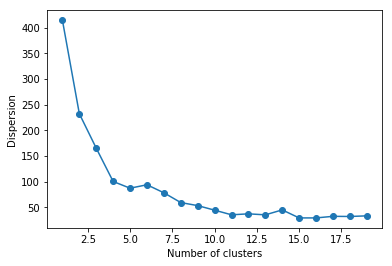

In [202]:
L=[]
a2= data[:,[2,4]]
a02=a2
a2[:,0]/70
a2[:,1]/100
for k in range(1, 20):
    f=kmeans(a2,k,0.001) 
    for i in range(7):
        f1=kmeans(a3,k,0.001)
        if (f1[1]<f[1]):
            f=f1
    L.append(f[1])
   # print(f[1])
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion')
plt.plot(range(1, 20), L, '-o')
plt.show()

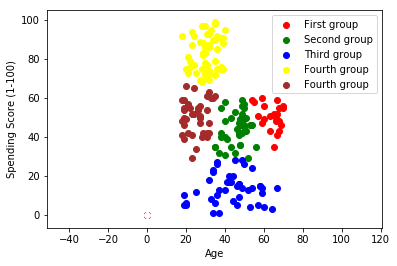

In [209]:
k=5
f=kmeans(a2,k,0.001) 
for i in range(7):
        f1=kmeans(a3,k,0.001)
        if (f1[1]<f[1]):
            f=f1
d=f[0]
#a1=np.arange(10).reshape((5, -1))
#print(d)
c=np.tile(a2, [k, 1, 1])-np.swapaxes(np.tile(d, [a2.shape[0], 1, 1]), 0, 1)
#print(c)
c1=LA.norm(c, axis = 2)
#print(d)
g=np.min(c1,axis = 0)
g=np.tile(g, [k, 1])
mask1 = c1 != g
mask = np.tile(mask1, [a2.shape[1], 1, 1]).swapaxes(0,1).swapaxes(1,2)
#print(mask)
h=np.tile(a02, [k, 1, 1])
h[mask]=0
#print(h[0].T)
plt.scatter(*h[0].T, c='r', label='First group')
plt.scatter(*h[1].T, c='g', label='Second group')
plt.scatter(*h[2].T, c='b', label='Third group')
plt.scatter(*h[3].T, c='yellow', label='Fourth group')
plt.scatter(*h[4].T, c='brown', label='Fourth group')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.scatter(0,0, c='w')
plt.axis('equal')
plt.legend()
plt.show()


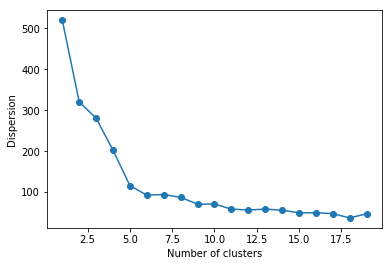

In [197]:
L=[]
a3= data[:,[3,4]]
a03=a3
a3[:,0]/137
a3[:,1]/100
for k in range(1, 20):
    f=kmeans(a3,k,0.001) 
    for i in range(7):
        f1=kmeans(a3,k,0.001)
        if (f1[1]<f[1]):
            f=f1
    L.append(f[1])
   # print(f[1])
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion')
plt.plot(range(1, 20), L, '-o')
plt.show()

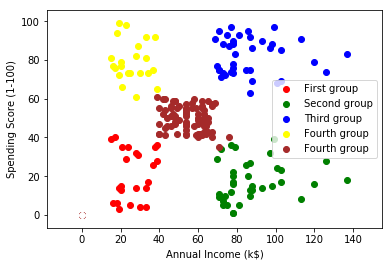

In [206]:
k=5
f=kmeans(a3,k,0.001) 
for i in range(7):
        f1=kmeans(a3,k,0.001)
        if (f1[1]<f[1]):
            f=f1
d=f[0]
#a1=np.arange(10).reshape((5, -1))
#print(d)
c=np.tile(a3, [k, 1, 1])-np.swapaxes(np.tile(d, [a3.shape[0], 1, 1]), 0, 1)
#print(c)
c1=LA.norm(c, axis = 2)
#print(d)
g=np.min(c1,axis = 0)
g=np.tile(g, [k, 1])
mask1 = c1 != g
mask = np.tile(mask1, [a3.shape[1], 1, 1]).swapaxes(0,1).swapaxes(1,2)
#print(mask)
h=np.tile(a03, [k, 1, 1])
h[mask]=0
#print(h[0].T)
plt.scatter(*h[0].T, c='r', label='First group')
plt.scatter(*h[1].T, c='g', label='Second group')
plt.scatter(*h[2].T, c='b', label='Third group')
plt.scatter(*h[3].T, c='yellow', label='Fourth group')
plt.scatter(*h[4].T, c='brown', label='Fourth group')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(0,0, c='w')
plt.axis('equal')
plt.legend()
plt.show()